In [1]:
import sys
import os
import glob
import numpy as np
import pandas as pd
import h5py
import matplotlib
import matplotlib.pyplot as plt
import seaborn

In [2]:
sys.path.append(os.getcwd() + "/../../cds-backend/code/")
import cds_eua4 as eua

matplotlib.rcParams.update({"font.size": 20})
matplotlib.rcParams["figure.figsize"] = (20, 10)

no config found


In [3]:
def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return array[idx]


In [4]:
rq = {
    "statid": "11035",
    
    "date": ["20050101-20051231"],
    "variable": ["air_temperature"],# "wind_speed", "geopotential"],
    "format": "nc",
    "optional": ['obs_minus_an','obs_minus_bg', 'bias_estimate_method', 'RISE_bias_estimate', 'RICH_bias_estimate', 'RASE_bias_estimate', 'RAOBCORE_bias_estimate',],
    # "dummy": str(np.random.rand()),
}
df = eua.vm_request_wrapper(rq, overwrite=True)# , vm_url="http://127.0.0.1:8007")
df = df.to_dataframe()

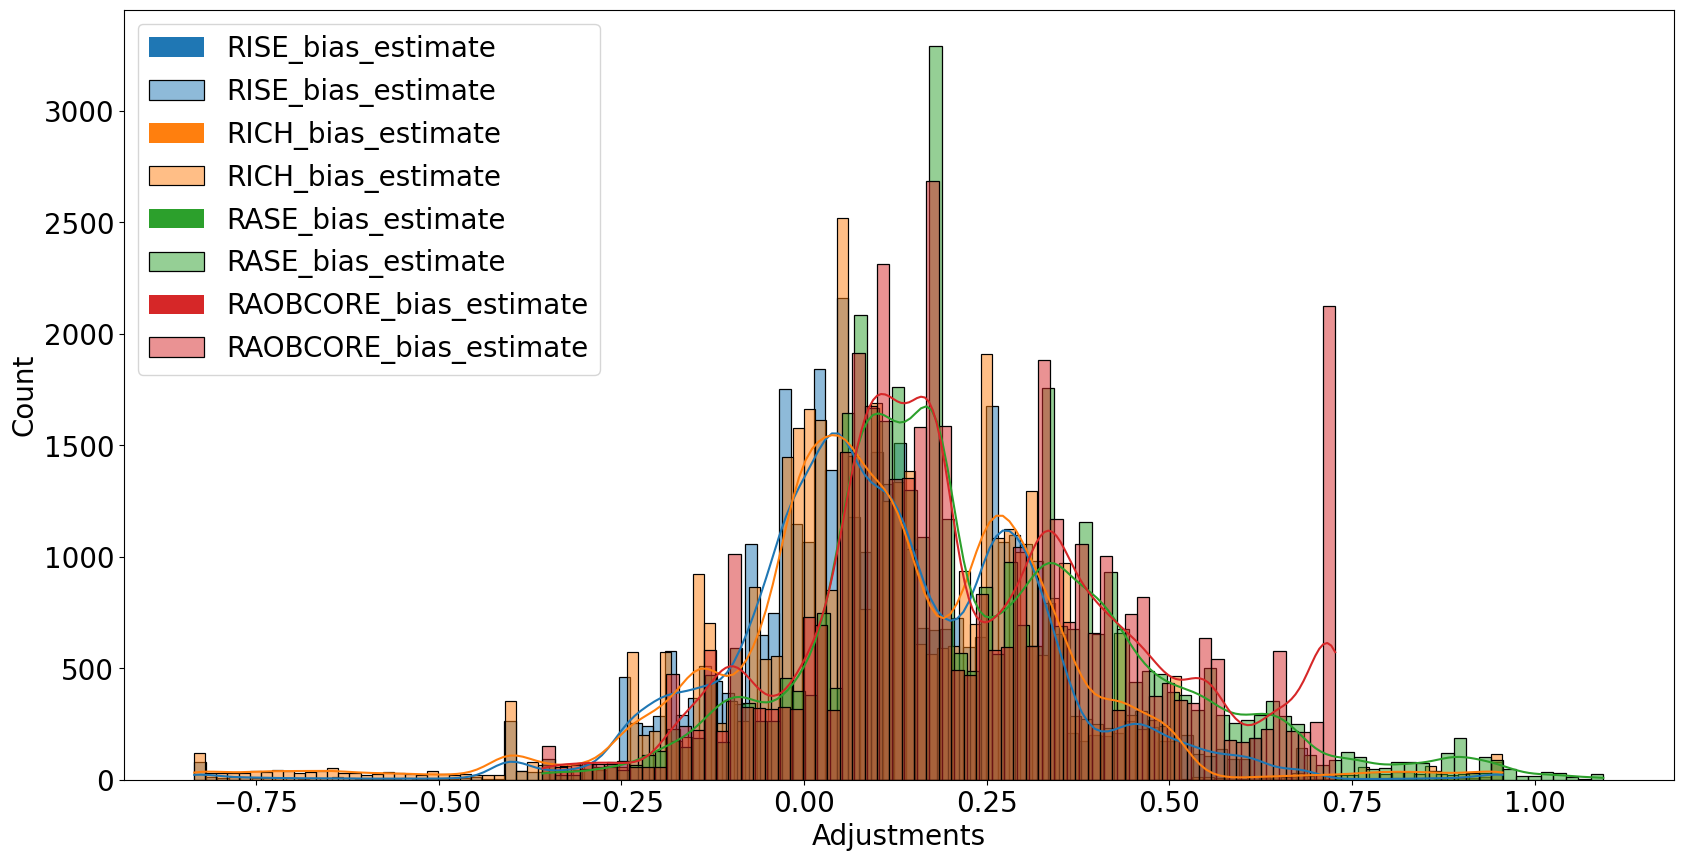

In [5]:
hist_data = []
for i in ['RISE_bias_estimate', 'RICH_bias_estimate', 'RASE_bias_estimate', 'RAOBCORE_bias_estimate',]:# 'obs_minus_an','obs_minus_bg']:
    hist_data.append(df[i].dropna())
    ax = seaborn.histplot(hist_data[-1], label = i, kde=True)
ax.set(xlabel='Adjustments')
plt.legend() 
plt.show()

In [6]:
with eua.CDMDataset(glob.glob("/scratch/das/federico/INTERCOMPARISON_MAURITIUS/*vais*.nc")[0]) as file:
    display(file)
    df_vais = file.to_dataframe(groups=['observations_table'], variables=['observation_value', 'observed_variable', 'date_time', 'z_coordinate'])
with eua.CDMDataset(glob.glob("/scratch/das/federico/INTERCOMPARISON_MAURITIUS/*meis*.nc")[0]) as file:
    display(file)
    df_meis = file.to_dataframe(groups=['observations_table'], variables=['observation_value', 'observed_variable', 'date_time', 'z_coordinate'])


File: <HDF5 file "0-20000-0-61995_mauritius_harvested_vaisala_ascents.csv.nc" (mode r)>
Filesize: 5.95 MB
Filename: /scratch/das/federico/INTERCOMPARISON_MAURITIUS/0-20000-0-61995_mauritius_harvested_vaisala_ascents.csv.nc
(G)roups/(V)ariables: 

 - G | crs__________________________________________ : : 4
 - V | dateindex____________________________________ : : (9,)
 - G | header_table_________________________________ : : 54
 - G | observations_table___________________________ : : 52
 - G | observed_variable____________________________ : : 9
 - V | recordindex__________________________________ : : (56,)
 - V | recordtimestamp______________________________ : : (56,)
 - G | sensor_configuration_________________________ : : 0
 - G | source_configuration_________________________ : : 32
 - G | station_configuration________________________ : : 44
 - G | station_configuration_codes__________________ : : 7
 - G | station_type_________________________________ : : 4
 - G | units__________________

File: <HDF5 file "0-20000-0-61995_mauritius_harvested_meisei_ascents.csv.nc" (mode r)>
Filesize: 10.86 MB
Filename: /scratch/das/federico/INTERCOMPARISON_MAURITIUS/0-20000-0-61995_mauritius_harvested_meisei_ascents.csv.nc
(G)roups/(V)ariables: 

 - G | crs__________________________________________ : : 4
 - V | dateindex____________________________________ : : (9,)
 - G | header_table_________________________________ : : 54
 - G | observations_table___________________________ : : 52
 - G | observed_variable____________________________ : : 9
 - V | recordindex__________________________________ : : (250268,)
 - V | recordtimestamp______________________________ : : (250268,)
 - G | sensor_configuration_________________________ : : 0
 - G | source_configuration_________________________ : : 32
 - G | station_configuration________________________ : : 44
 - G | station_configuration_codes__________________ : : 7
 - G | station_type_________________________________ : : 4
 - G | units___________

In [7]:
df_vais.date_time.drop_duplicates()

0         2005-02-07 10:01:53
18352     2005-02-07 14:57:50
38656     2005-02-07 19:31:41
58040     2005-02-08 05:13:16
79884     2005-02-08 10:00:56
100672    2005-02-08 15:03:03
119600    2005-02-08 19:33:03
144856    2005-02-09 05:12:00
161280    2005-02-09 10:05:05
187024    2005-02-09 14:59:48
209236    2005-02-09 19:17:51
224020    2005-02-10 05:02:13
244496    2005-02-10 09:58:41
266720    2005-02-10 14:57:54
295172    2005-02-10 19:00:19
323964    2005-02-11 05:02:45
346648    2005-02-11 15:05:21
368732    2005-02-11 18:31:58
374712    2005-02-12 15:00:05
400388    2005-02-12 18:36:55
424268    2005-02-14 05:06:57
446408    2005-02-14 10:08:04
472652    2005-02-14 15:00:54
503640    2005-02-14 18:00:36
515844    2005-02-15 05:16:46
546256    2005-02-15 10:03:06
572228    2005-02-15 15:01:34
586648    2005-02-15 18:11:25
608512    2005-02-16 05:11:08
629408    2005-02-16 10:03:34
656620    2005-02-17 10:15:24
677012    2005-02-17 14:59:11
695404    2005-02-17 18:03:18
722384    

In [8]:
df_meis.date_time.drop_duplicates()

0         2005-02-07 00:00:00
4         2005-02-07 00:00:01
8         2005-02-07 00:00:02
12        2005-02-07 00:00:03
16        2005-02-07 00:00:04
                  ...        
1007700   2005-02-25 21:02:12
1007704   2005-02-25 21:02:13
1007708   2005-02-25 21:02:14
1007712   2005-02-25 21:02:15
1007716   2005-02-25 21:02:16
Name: date_time, Length: 250268, dtype: datetime64[ns]

In [9]:
df_meis[np.logical_and(df_meis.date_time <= '2005-02-07 14:57:50' ,df_meis.date_time >= '2005-02-07 10:01:53')]

,observation_value,observed_variable,date_time,z_coordinate
12228,302.750000,126,2005-02-07 13:36:55,100990.0
12229,0.612000,138,2005-02-07 13:36:55,100990.0
12230,0.000000,107,2005-02-07 13:36:55,100990.0
12231,180.000000,106,2005-02-07 13:36:55,100990.0
12232,302.350006,126,2005-02-07 13:37:37,100990.0
...,...,...,...,...
30863,75.129997,106,2005-02-07 14:57:49,2450.0
30864,216.850006,126,2005-02-07 14:57:50,2440.0
30865,0.010000,138,2005-02-07 14:57:50,2440.0
30866,15.600000,107,2005-02-07 14:57:50,2440.0


In [10]:
df_vais[np.logical_and(df_vais.date_time <= '2005-02-07 14:57:50' ,df_vais.date_time >= '2005-02-07 10:01:53')]

,observation_value,observed_variable,date_time,z_coordinate
0,235.449997,126,2005-02-07 10:01:53,670.0
1,0.010000,138,2005-02-07 10:01:53,670.0
2,23.600000,107,2005-02-07 10:01:53,670.0
3,64.000000,106,2005-02-07 10:01:53,670.0
4,235.449997,126,2005-02-07 10:01:53,670.0
...,...,...,...,...
38651,73.000000,106,2005-02-07 14:57:50,96220.0
38652,298.149994,126,2005-02-07 14:57:50,96260.0
38653,0.860000,138,2005-02-07 14:57:50,96260.0
38654,4.600000,107,2005-02-07 14:57:50,96260.0


In [11]:
import re
for i in glob.glob('/users/staff/uvoggenberger/CEUAS/CEUAS/public/intercomparisons/DATA/*/*.001'):
    # reading the CSV file
    text = open(i, "r")

    #join() method combines all contents of 
    # csvfile.csv and formed as a string
    text = ''.join([i for i in text]) 

    # search and replace the contents
    text = text.replace("\t", ",") 
    text = re.sub(" +", ",", text)
    # output.csv is the output file opened in write mode
    x = open('./'+i.split('/')[-1],"w")

    # all the replaced text is written in the output.csv file
    x.writelines(text)
    x.close()

In [12]:
yang_dfs = []
for i in glob.glob('./*.001'):
    df = pd.read_csv(i, delimiter=',', header=0)
    print(i)
    yang_dfs.append(df)

./Changf.001
./Graw.001
./Vaisala.001
./Meisei.001
./Huayun.001


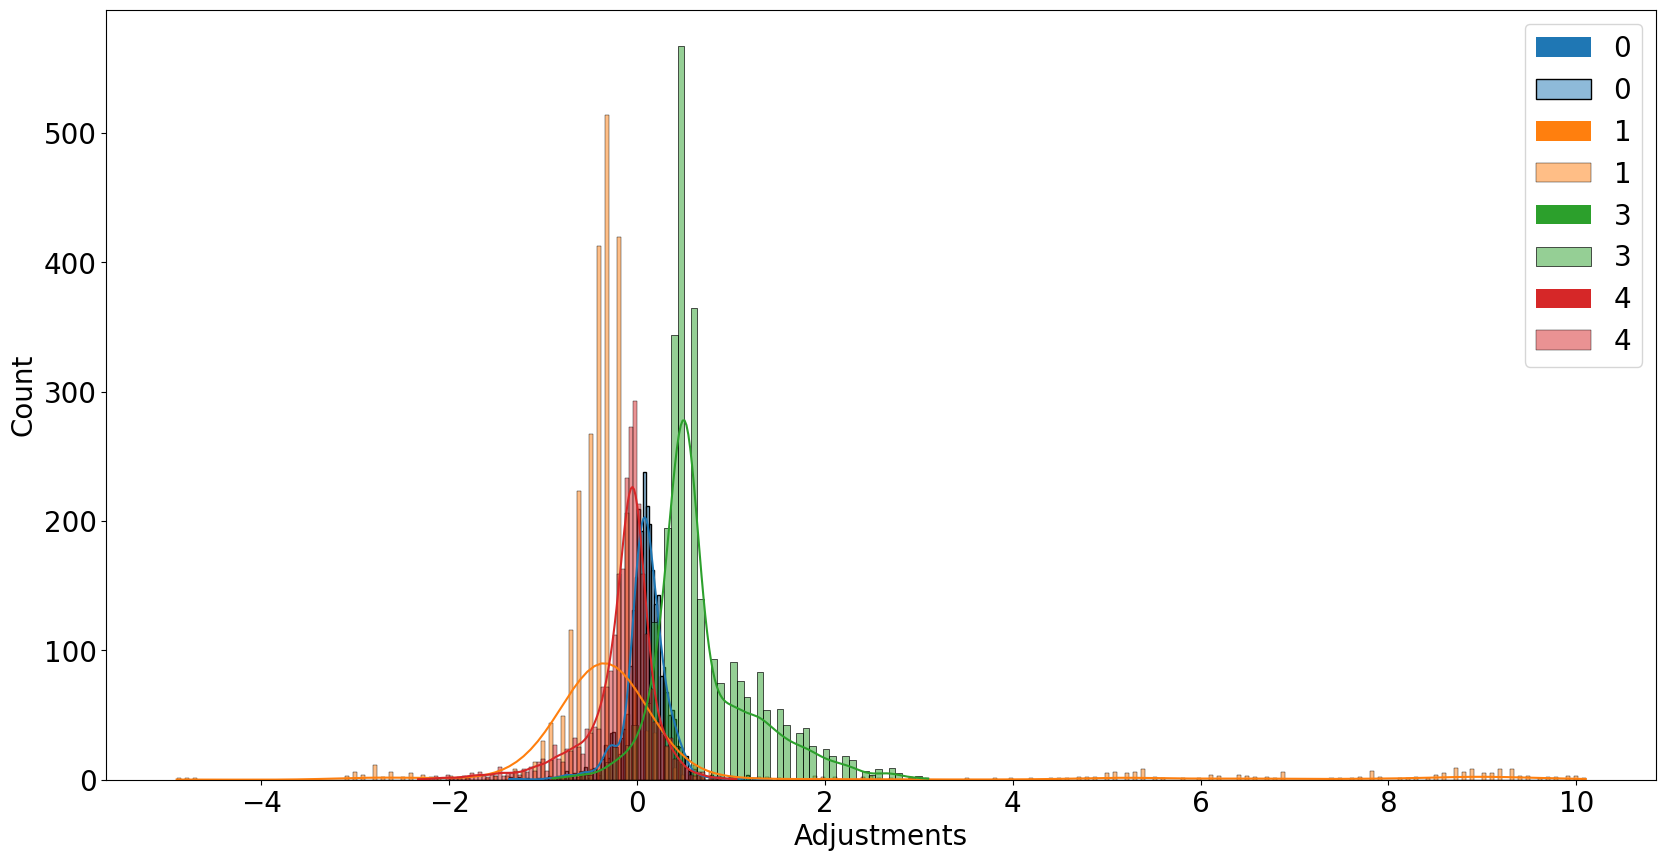

In [13]:
for sonde in [0, 1, 3, 4]:
    delta_t = []
    yang_dfs[sonde].Pressure = pd.to_numeric(yang_dfs[sonde].Pressure, errors='coerce')
    yang_dfs[sonde] = yang_dfs[sonde].dropna(subset = ['Pressure'])
    for press in range(len(yang_dfs[2])):
        delta_t.append(
            yang_dfs[2].Temperature.iloc[press]
            - yang_dfs[sonde][
                yang_dfs[sonde].Pressure
                == find_nearest(
                    np.array(yang_dfs[sonde].Pressure),
                    yang_dfs[2].Pressure.iloc[press]
                )
            ].Temperature.values[0]
        )
    ax = seaborn.histplot(delta_t, label=sonde, kde=True)
ax.set(xlabel="Adjustments")
plt.legend()
plt.show()

In [54]:
rq = {
    "area": [-19,57,-21,59],    
    "date": ["20050101-20051231"],
    "variable": ["air_temperature"],# "wind_speed", "geopotential"],
    "format": "nc",
    "optional": ['obs_minus_an','obs_minus_bg', 'bias_estimate_method', 'RISE_bias_estimate', 'RICH_bias_estimate', 'RASE_bias_estimate', 'RAOBCORE_bias_estimate',],
    # "dummy": str(np.random.rand()),
}
df = eua.vm_request_wrapper(rq, overwrite=True)# , vm_url="http://127.0.0.1:8007")
df = df.to_dataframe()

AttributeError: 'CDMDatasetList' object has no attribute 'to_dataframe'

In [58]:
df

CDMDatasetList <2>
- dest_0-20000-0-61995_air_temperature
  File: <HDF5 file "dest_0-20000-0-61995_air_temperature.nc" (mode r)>
  Filesize: 0.19 MB
  Filename: ./dest_0-20000-0-61995_air_temperature.nc
  (G)roups/(V)ariables: 
  
   - V | RAOBCORE_bias_estimate_______________________ : : (6257,)
   - V | RASE_bias_estimate___________________________ : : (6257,)
   - V | RICH_bias_estimate___________________________ : : (6257,)
   - V | RISE_bias_estimate___________________________ : : (6257,)
   - V | lat__________________________________________ : : (6257,)
   - V | lon__________________________________________ : : (6257,)
   - V | obs__________________________________________ : : (6257,)
   - V | obs_minus_an_________________________________ : : (6257,)
   - V | obs_minus_bg_________________________________ : : (6257,)
   - V | plev_________________________________________ : : (6257,)
   - V | report_id____________________________________ : : (6257, 21)
   - V | station_id__________

<AxesSubplot:ylabel='Count'>

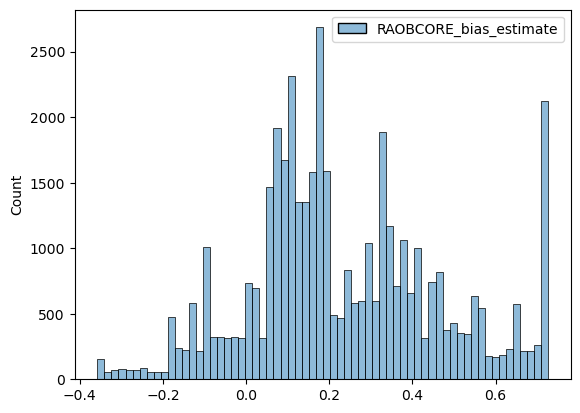

In [31]:
rq = {
    "statid": "11035",
    
    "date": ["20050101-20051231"],
    "variable": ["air_temperature"],# "wind_speed", "geopotential"],
    "format": "nc",
    "optional": ['obs_minus_an','obs_minus_bg', 'bias_estimate_method', 'RISE_bias_estimate', 'RICH_bias_estimate', 'RASE_bias_estimate', 'RAOBCORE_bias_estimate',],
    # "dummy": str(np.random.rand()),
}
df = eua.vm_request_wrapper(rq, overwrite=True)# , vm_url="http://127.0.0.1:8007")
df = df.to_dataframe()

(array([[ 2.,  3.,  3.,  1.,  0.,  1.],
        [11.,  0.,  0.,  0.,  0.,  0.]]),
 array([-3.57968539e-01,  1.94120169e+03,  3.88276135e+03,  5.82432102e+03,
         7.76588068e+03,  9.70744034e+03,  1.16490000e+04]),
 <a list of 2 BarContainer objects>)

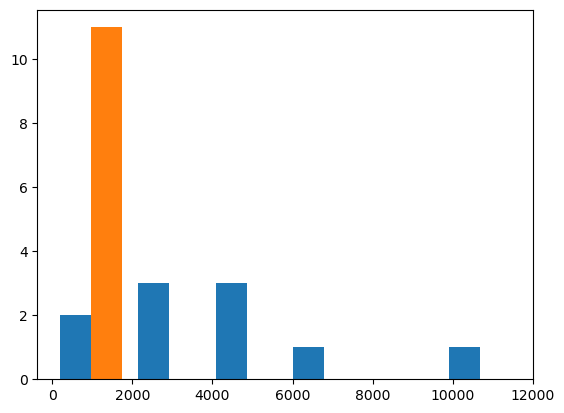

In [27]:
H, bins = np.histogram(data[:6], bins=5, range=[-1, 4])
H+=np.histogram(data[6:], bins=5,range=[-1, 4])[0]

plt.bar(bins[:-1],H,width=1)